# Preprocessing level

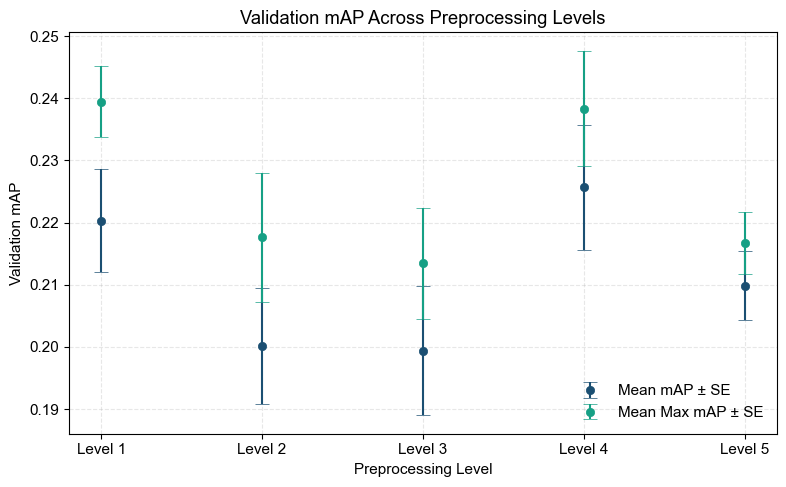

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Font settings for figures (sans-serif preferred for clarity)
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 11
})

# Color palette
primary_color = '#1B4F72'  # Deep blue
secondary_color = '#16A085'  # Teal
accent_color = '#D35400'  # Burnt orange

# Data
group1 = [0.23934,0.19166,0.23716,0.2110183537,0.205441907,0.2373736054]
group2 = [0.18937,0.19360,0.19061,0.2083299756,0.1770501733,0.2422171235]
group3 = [0.19220,0.17993,0.23359,0.1940507442,0.1697632372,0.2270682603]
group4 = [0.2355785519,0.2204155922,0.1826911718,
          0.257622391,0.2309179753,0.2267198414]
group5 = [0.2201425731,0.2172321528,0.192281574,0.2201425731,0.2172321528,0.192281574]


# max
group1_max = [0.26079,0.22687,0.25134,0.23037,0.22734,0.23997]
group2_max = [0.21109,0.20385,0.22151,0.21694,0.18877,0.26349]
group3_max = [0.20069,0.22213,0.24244,0.20272,0.18315,0.22964]
group4_max = [0.25785,0.23043,0.20291,0.26813,0.23503,0.2357]
group5_max = [0.22754,0.22113,0.20153,0.22754,0.22113,0.20153]

data = [group1, group2, group3, group4, group5]
data_max = [group1_max, group2_max, group3_max, group4_max, group5_max]
x = np.arange(1, len(data) + 1)

# Calculate means and SEs
means = [np.mean(g) for g in data]
ses = [np.std(g, ddof=1) / np.sqrt(len(g)) for g in data]

means_max = [np.mean(g) for g in data_max]
ses_max = [np.std(g, ddof=1) / np.sqrt(len(g)) for g in data_max]

# Create scatter plot with error bars
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(
    x, means, yerr=ses,
    fmt='o',
    color=primary_color,
    ecolor=primary_color,
    elinewidth=1.5,
    capsize=5,
    markersize=6,
    markeredgewidth=0.5,
    label='Mean mAP ± SE'
)
ax.errorbar(
    x, means_max, yerr=ses_max,
    fmt='o',
    color=secondary_color,
    ecolor=secondary_color,
    elinewidth=1.5,
    capsize=5,
    markersize=6,
    markeredgewidth=0.5,
    label='Mean Max mAP ± SE'
)

# Axis settings
ax.set_xticks(x)
ax.set_xticklabels([f'Level {i}' for i in x])
ax.set_xlabel('Preprocessing Level', color='black')
ax.set_ylabel('Validation mAP', color='black')
ax.set_title('Validation mAP Across Preprocessing Levels', color='black')

# Grid and aesthetics
ax.grid(True, linestyle='--', alpha=0.3)
ax.spines[:].set_color('black')  # All borders black
ax.tick_params(colors='black')

# Legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


In [2]:
# t test

from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(group4, group2, equal_var=False)  # Welch's t-test recommended
print(f"t={t_stat:.4f}, p={p_val:.4f}")


t=1.8565, p=0.0932


In [3]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(group1, group2, group3, group4, group5)
print(f"ANOVA F={f_stat:.4f}, p={p_val:.4f}")


ANOVA F=1.7419, p=0.1724


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# New data
group_names = ['Level1', 'Level2', 'Level3', 'Level4', 'Level5']
data = {
    'Level1': group1,
    'Level2': group2,
    'Level3': group3,
    'Level4': group4,
    'Level5': group5,
}

# Build long-form DataFrame
rows = []
for group, values in data.items():
    for i, val in enumerate(values):
        split = 'split1' if i < 3 else 'split2'
        rows.append({'group': group, 'split': split, 'value': val})
df = pd.DataFrame(rows)

# Two‐way ANOVA with split as a block
model = ols('value ~ C(group) + C(split)', data=df).fit()
anova_results = anova_lm(model, typ=2)   # Type II ANOVA
print(anova_results)


            sum_sq    df         F    PR(>F)
C(group)  0.003322   4.0  1.721741  0.178061
C(split)  0.000343   1.0  0.710975  0.407446
Residual  0.011576  24.0       NaN       NaN


None are statistically significant because p>0.05.

Random values

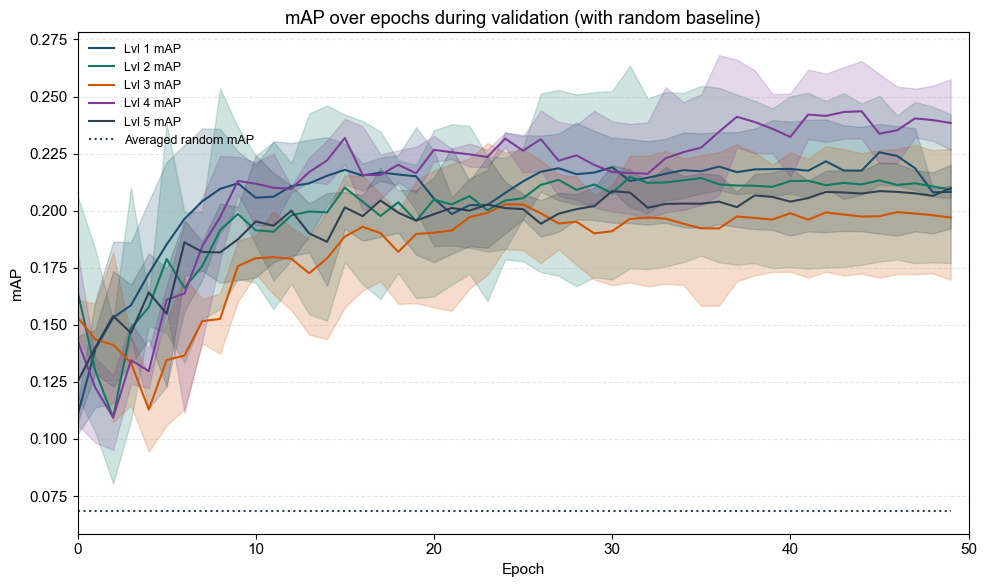

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('/Users/amee/Downloads/Raptor preprocessing level results - mAP preprocessing2_export.csv')

# Set plot style
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 11
})

# Define color palette
colors = {
    1: '#1B4F72',  # Deep Blue
    2: '#117A65',  # Teal
    3: '#D35400',  # Burnt Orange
    4: '#7D3C98',  # Optional 4th color
    5: '#2E4053'   # Optional 5th color
}

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

for lvl in range(1, 6):
    # Column names for this level
    mean_col = f'preprocess_lvl: {lvl} - val/mAP'
    min_col = f'preprocess_lvl: {lvl} - val/mAP__MIN'
    max_col = f'preprocess_lvl: {lvl} - val/mAP__MAX'
    # rand_col = f'lvl {lvl} random map'
    
    # Extract data
    epochs = df['epoch']
    mean = df[mean_col]
    min_val = df[min_col]
    max_val = df[max_col]
    # random = df[rand_col]
    
    # Plot mean line
    ax.plot(epochs, mean, color=colors[lvl], label=f'Lvl {lvl} mAP')
    
    # Fill between min/max
    ax.fill_between(epochs, min_val, max_val, color=colors[lvl], alpha=0.2)
    
    # # Plot random dotted line
    # ax.plot(epochs, random, linestyle=':', color=colors[lvl], label=f'Lvl {lvl} random mAP')
    if lvl==5:
     rand_col = 'random value'
     random = df[rand_col]
     ax.plot(epochs, random, linestyle=':', color=colors[lvl], label=f'Averaged random mAP')

# Aesthetics
ax.set_xlabel('Epoch', color='black')
ax.set_ylabel('mAP', color='black')
ax.set_title('mAP over epochs during validation (with random baseline)', color='black')
ax.grid(True, axis='y', linestyle='--', alpha=0.3)
ax.tick_params(colors='black')
ax.spines[:].set_color('black')
ax.legend(frameon=False, fontsize=9, loc='best')
ax.set_xlim(0, 50)  # Set y-axis limits

plt.tight_layout()
plt.show()


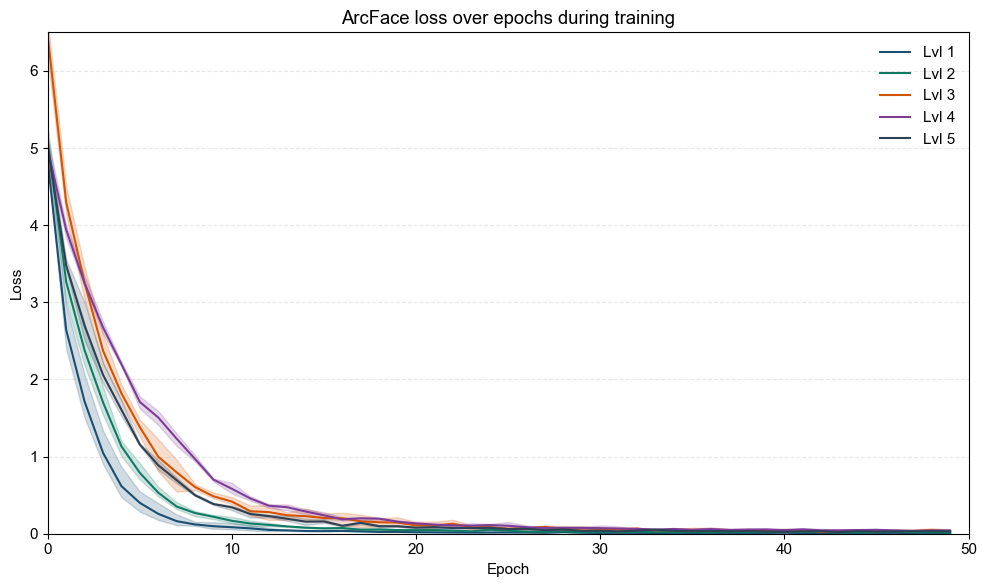

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('/Users/amee/Downloads/Raptor preprocessing level results - train_loss.csv') 

# Set plot style
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 11
})

# Define color palette
colors = {
    1: '#1B4F72',  # Deep Blue
    2: '#117A65',  # Teal
    3: '#D35400',  # Burnt Orange
    4: '#7D3C98',  # Optional 4th color
    5: '#2E4053'   # Optional 5th color
}

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

for lvl in range(1, 6):
    # Column names for this level
    mean_col = f'preprocess_lvl: {lvl} - train/loss'
    min_col = f'preprocess_lvl: {lvl} - train/loss__MIN'
    max_col = f'preprocess_lvl: {lvl} - train/loss__MAX'
    
    # Extract data
    epochs = df['epoch']
    mean = df[mean_col]
    min_val = df[min_col]
    max_val = df[max_col]
    # random = df[rand_col]
    
    # Plot mean line
    ax.plot(epochs, mean, color=colors[lvl], label=f'Lvl {lvl}')
    
    # Fill between min/max
    ax.fill_between(epochs, min_val, max_val, color=colors[lvl], alpha=0.2)


# Aesthetics
ax.set_xlabel('Epoch', color='black')
ax.set_ylabel('Loss', color='black')
ax.set_xlim(0, 50)
ax.set_ylim(0, 6.5)
ax.set_title('ArcFace loss over epochs during training', color='black')
ax.grid(True, axis='y', linestyle='--', alpha=0.3)
ax.tick_params(colors='black')
ax.spines[:].set_color('black')
ax.legend(frameon=False, fontsize=11, loc='best')

plt.tight_layout()
plt.show()


# Dataset scope

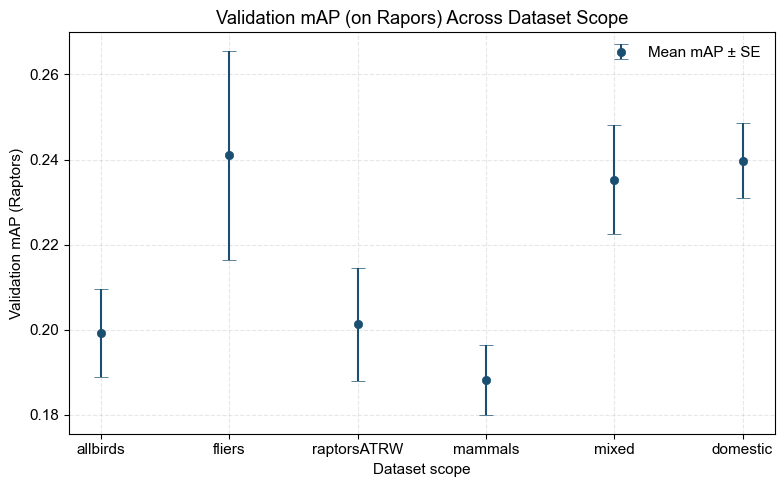

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Font settings for figures (sans-serif preferred for clarity)
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 11
})

# Color palette
primary_color = '#1B4F72'  # Deep blue
secondary_color = '#16A085'  # Teal
accent_color = '#D35400'  # Burnt orange

# Data
group1 = [0.20788,0.21130,0.17842]
group2 = [0.23207,0.28740,0.20356]
group3 = [0.22677,0.18266,0.19432]
group4 = [0.20308,0.17471,0.18640]
group5 = [0.23915,0.25522,0.21136]
group6 = [0.23487,0.25679,0.22762]

data = [group1, group2, group3, group4, group5, group6]
x = np.arange(1, len(data) + 1)

# Calculate means and SEs
means = [np.mean(g) for g in data]
ses = [np.std(g, ddof=1) / np.sqrt(len(g)) for g in data]

# Create scatter plot with error bars
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(
    x, means, yerr=ses,
    fmt='o',
    color=primary_color,
    ecolor=primary_color,
    elinewidth=1.5,
    capsize=5,
    markersize=6,
    markeredgewidth=0.5,
    label='Mean mAP ± SE'
)

# Axis settings
ax.set_xticks(x)
ax.set_xticklabels(['allbirds','fliers','raptorsATRW','mammals','mixed', 'domestic'])
ax.set_xlabel('Dataset scope', color='black')
ax.set_ylabel('Validation mAP (Raptors)', color='black')
ax.set_title('Validation mAP (on Rapors) Across Dataset Scope', color='black')

# Grid and aesthetics
ax.grid(True, linestyle='--', alpha=0.3)
ax.spines[:].set_color('black')  # All borders black
ax.tick_params(colors='black')

# Legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


In [7]:
# t test

from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test recommended
print(f"t={t_stat:.4f}, p={p_val:.4f}")


t=-1.5640, p=0.2257


In [8]:
import numpy as np
from scipy.stats import ttest_ind
from itertools import combinations

# Perform Welch's t-test for all pairwise combinations
for i, j in combinations(range(len(data)), 2):
    t_stat, p_val = ttest_ind(data[i], data[j], equal_var=False)
    print(f"group{i+1} vs group{j+1}: t={t_stat:.4f}, p={p_val:.4f}")

group1 vs group2: t=-1.5640, p=0.2257
group1 vs group3: t=-0.1218, p=0.9092
group1 vs group4: t=0.8378, p=0.4517
group1 vs group5: t=-2.1812, p=0.0974
group1 vs group6: t=-2.9755, p=0.0425
group2 vs group3: t=1.4237, p=0.2480
group2 vs group4: t=2.0402, p=0.1546
group2 vs group5: t=0.2078, p=0.8486
group2 vs group6: t=0.0478, p=0.9654
group3 vs group4: t=0.8478, p=0.4528
group3 vs group5: t=-1.8483, p=0.1383
group3 vs group6: t=-2.4306, p=0.0815
group4 vs group5: t=-3.0983, p=0.0449
group4 vs group6: t=-4.2984, p=0.0128
group5 vs group6: t=-0.2909, p=0.7873


In [9]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(group1, group2, group3, group4, group5,group6)
print(f"ANOVA F={f_stat:.4f}, p={p_val:.4f}")


ANOVA F=2.8342, p=0.0646


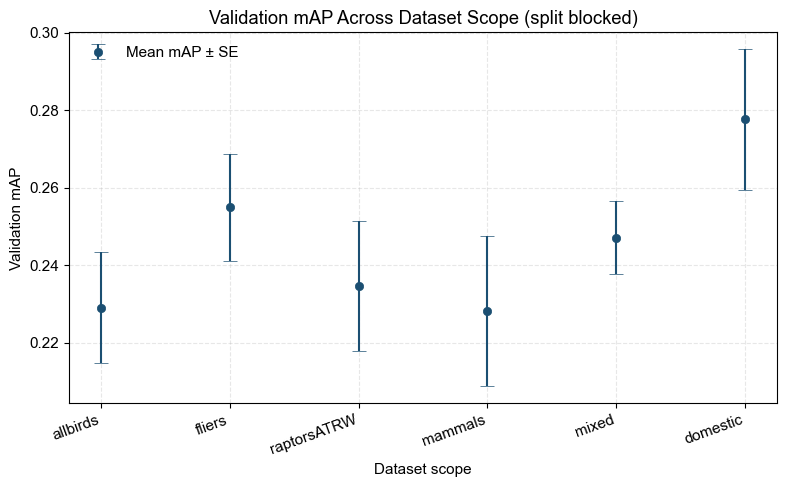

            sum_sq    df         F    PR(>F)
C(group)  0.010886   5.0  1.481357  0.225261
Residual  0.044092  30.0       NaN       NaN


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Font settings for figures
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 11
})

# Color palette
primary_color   = '#1B4F72'
secondary_color = '#16A085'
accent_color    = '#D35400'

# Raw data
group_names = ['allbirds','fliers','raptorsATRW','mammals','mixed','domestic']
raw_data = {
    'allbirds':    [0.20788,0.21130,0.17842, 0.24957,0.26492,0.26199],
    'fliers':      [0.23207,0.28740,0.20356, 0.26951,0.24749,0.28957],
    'raptorsATRW': [0.22677,0.18266,0.19432, 0.26598,0.28857,0.24910],
    'mammals':     [0.20308,0.17471,0.18640, 0.26466,0.29520,0.24469],
    'mixed':       [0.23915,0.25522,0.21136, 0.28149,0.24255,0.25259],
    'domestic':    [0.23487,0.25679,0.22762, 0.32932,0.29283,0.32414],
}

# Build a long-form DataFrame
rows = []
for grp, vals in raw_data.items():
    for i, v in enumerate(vals):
        split = 'split1' if i < 3 else 'split2'
        rows.append({'group': grp, 'split': split, 'value': v})
df = pd.DataFrame(rows)

# Compute per-group means & SE for plotting (as before)
means = df.groupby('group')['value'].mean().loc[group_names]
ses   = df.groupby('group')['value'].sem().loc[group_names]
x     = np.arange(1, len(group_names) + 1)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(
    x, means, yerr=ses,
    fmt='o', color=primary_color, ecolor=primary_color,
    elinewidth=1.5, capsize=5, markersize=6, markeredgewidth=0.5,
    label='Mean mAP ± SE'
)
ax.set_xticks(x)
ax.set_xticklabels(group_names, rotation=20, ha='right')
ax.set_xlabel('Dataset scope')
ax.set_ylabel('Validation mAP')
ax.set_title('Validation mAP Across Dataset Scope (split blocked)')
ax.grid(True, linestyle='--', alpha=0.3)
ax.spines[:].set_color('black')
ax.tick_params(colors='black')
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

# Two‐way ANOVA with split as a block
model = ols('value ~ C(group) + C(split)', data=df).fit()
# model = ols('value ~ C(group)', data=df).fit()
anova_results = anova_lm(model, typ=2)   # Type II sums of squares
print(anova_results)

In [12]:
# Perform Welch's t-tests for all pairwise combinations
for g1, g2 in combinations(group_names, 2):
    t_stat, p_val = ttest_ind(raw_data[g1], raw_data[g2], equal_var=False)
    print(f"{g1:12} vs {g2:12} -> t={t_stat:.4f}, p={p_val:.4f}")

allbirds     vs fliers       -> t=-1.3068, p=0.2206
allbirds     vs raptorsATRW  -> t=-0.2517, p=0.8065
allbirds     vs mammals      -> t=0.0369, p=0.9714
allbirds     vs mixed        -> t=-1.0561, p=0.3195
allbirds     vs domestic     -> t=-2.1070, p=0.0628
fliers       vs raptorsATRW  -> t=0.9370, p=0.3717
fliers       vs mammals      -> t=1.1258, p=0.2893
fliers       vs mixed        -> t=0.4727, p=0.6479
fliers       vs domestic     -> t=-0.9965, p=0.3441
raptorsATRW  vs mammals      -> t=0.2507, p=0.8072
raptorsATRW  vs mixed        -> t=-0.6486, p=0.5351
raptorsATRW  vs domestic     -> t=-1.7413, p=0.1124
mammals      vs mixed        -> t=-0.8775, p=0.4085
mammals      vs domestic     -> t=-1.8628, p=0.0922
mixed        vs domestic     -> t=-1.4977, p=0.1750


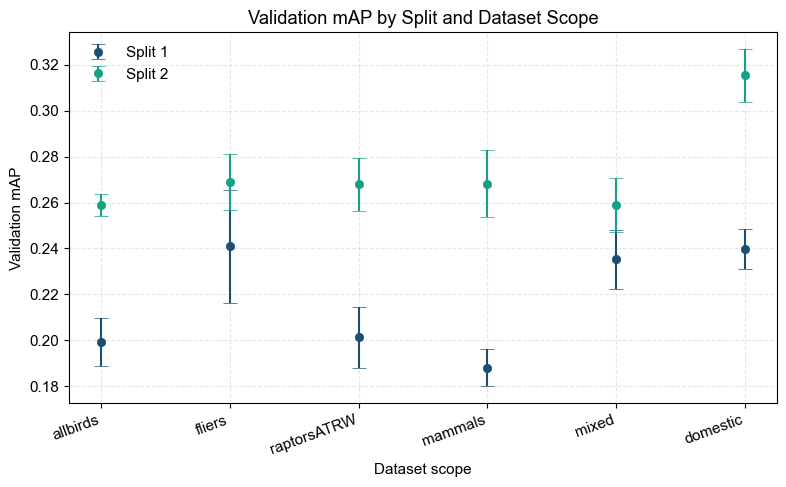

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Font settings for figures (sans-serif preferred for clarity)
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 11
})

# Color palette
primary_color   = '#1B4F72'  # Deep blue for Split 1
secondary_color = '#16A085'  # Teal for Split 2

# Raw data: first 3 entries are Split 1, last 3 are Split 2
raw_data = {
    'allbirds':    [0.20788, 0.21130, 0.17842,  0.24957, 0.26492, 0.26199],
    'fliers':      [0.23207, 0.28740, 0.20356,  0.26951, 0.24749, 0.28957],
    'raptorsATRW': [0.22677, 0.18266, 0.19432,  0.26598, 0.28857, 0.24910],
    'mammals':     [0.20308, 0.17471, 0.18640,  0.26466, 0.29520, 0.24469],
    'mixed':       [0.23915, 0.25522, 0.21136,  0.28149, 0.24255, 0.25259],
    'domestic':    [0.23487, 0.25679, 0.22762,  0.32932, 0.29283, 0.32414],
}

# Prepare split-specific lists
groups = list(raw_data.keys())
split1_data = [raw_data[g][:3] for g in groups]
split2_data = [raw_data[g][3:] for g in groups]

# Compute means and standard errors
split1_means = [np.mean(vals) for vals in split1_data]
split1_ses   = [np.std(vals, ddof=1) / np.sqrt(len(vals)) for vals in split1_data]
split2_means = [np.mean(vals) for vals in split2_data]
split2_ses   = [np.std(vals, ddof=1) / np.sqrt(len(vals)) for vals in split2_data]

x = np.arange(1, len(groups) + 1)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(
    x, split1_means, yerr=split1_ses,
    fmt='o', color=primary_color, ecolor=primary_color,
    elinewidth=1.5, capsize=5, markersize=6, markeredgewidth=0.5,
    label='Split 1'
)
ax.errorbar(
    x, split2_means, yerr=split2_ses,
    fmt='o', color=secondary_color, ecolor=secondary_color,
    elinewidth=1.5, capsize=5, markersize=6, markeredgewidth=0.5,
    label='Split 2'
)

# Axis settings
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=20, ha='right')
ax.set_xlabel('Dataset scope', color='black')
ax.set_ylabel('Validation mAP', color='black')
ax.set_title('Validation mAP by Split and Dataset Scope', color='black')

# Grid and aesthetics
ax.grid(True, linestyle='--', alpha=0.3)
ax.spines[:].set_color('black')
ax.tick_params(colors='black')

# Legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


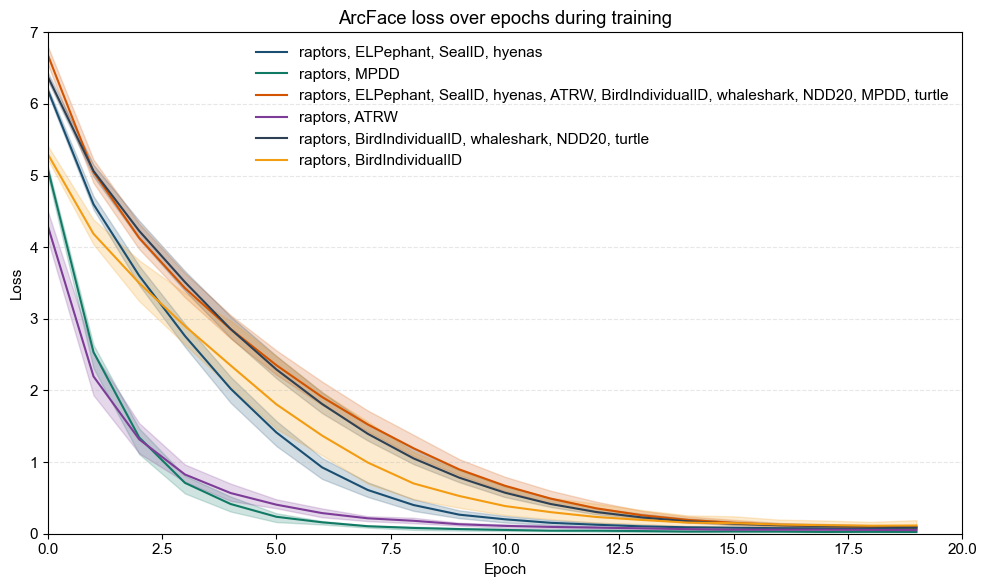

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('/Users/amee/Downloads/Raptor datascope results - loss values.csv') 

# Set plot style
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 11
})

# Define color palette
colors = {
    1: '#1B4F72',  # Deep Blue
    2: '#117A65',  # Teal
    3: '#D35400',  # Burnt Orange
    4: '#7D3C98',  # Optional 4th color
    5: '#2E4053',   # Optional 5th color
    6: '#F39C12'   # Optional 6th color
}

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

combinations = ['raptors, ELPephant, SealID, hyenas', 
                'raptors, MPDD',
                'raptors, ELPephant, SealID, hyenas, ATRW, BirdIndividualID, whaleshark, NDD20, MPDD, turtle',
                'raptors, ATRW',
                'raptors, BirdIndividualID, whaleshark, NDD20, turtle',
                'raptors, BirdIndividualID',
                ]
i=0
for names in combinations:
    i+=1
    # Column names for this level
    mean_col = f'wildlife_name: {names} - train/loss'
    min_col = f'wildlife_name: {names} - train/loss__MIN'
    max_col = f'wildlife_name: {names} - train/loss__MAX'
    
    # Extract data
    epochs = df['epoch']
    mean = df[mean_col]
    min_val = df[min_col]
    max_val = df[max_col]
    # random = df[rand_col]
    
    # Plot mean line
    ax.plot(epochs, mean, color=colors[i], label=f'{names}')
    
    # Fill between min/max
    ax.fill_between(epochs, min_val, max_val, color=colors[i], alpha=0.2)


# Aesthetics
ax.set_xlabel('Epoch', color='black')
ax.set_ylabel('Loss', color='black')
ax.set_xlim(0, 20)
ax.set_ylim(0, 7)
ax.set_title('ArcFace loss over epochs during training', color='black')
ax.grid(True, axis='y', linestyle='--', alpha=0.3)
ax.tick_params(colors='black')
ax.spines[:].set_color('black')
ax.legend(frameon=False, fontsize=11, loc='best')

plt.tight_layout()
plt.show()


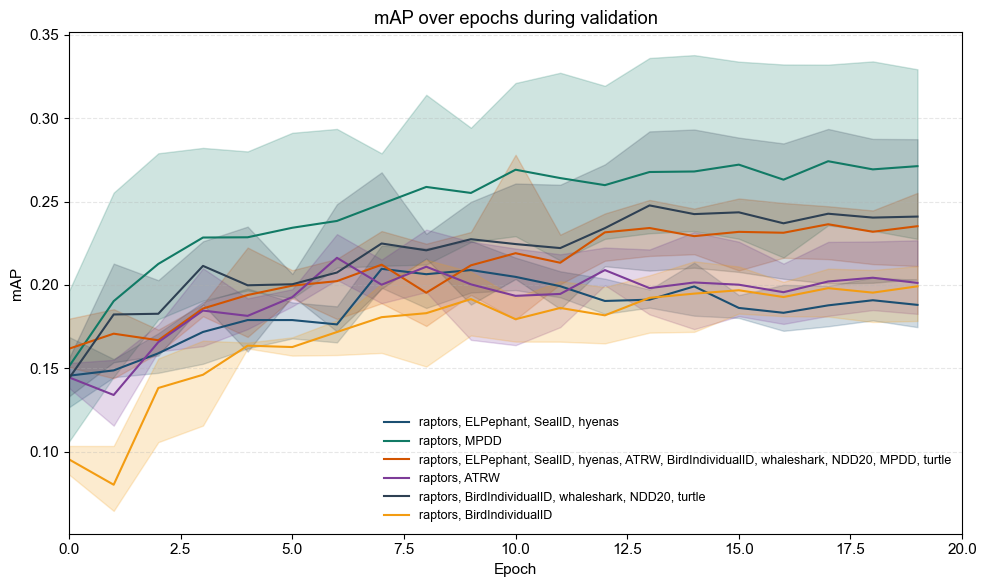

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('/Users/amee/Downloads/Raptor datascope results - map scores first split.csv')

# Set plot style
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 11
})

# Define color palette
colors = {
    1: '#1B4F72',  # Deep Blue
    2: '#117A65',  # Teal
    3: '#D35400',  # Burnt Orange
    4: '#7D3C98',  # Optional 4th color
    5: '#2E4053',   # Optional 5th color
    6: '#F39C12'   # Optional 6th color
}

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

combinations = ['raptors, ELPephant, SealID, hyenas', 
                'raptors, MPDD',
                'raptors, ELPephant, SealID, hyenas, ATRW, BirdIndividualID, whaleshark, NDD20, MPDD, turtle',
                'raptors, ATRW',
                'raptors, BirdIndividualID, whaleshark, NDD20, turtle',
                'raptors, BirdIndividualID',
                ]
i=0

for names in combinations:
    i+=1
    # Column names for this level
    mean_col = f'wildlife_name: {names} - val/mAP_raptors'
    min_col = f'wildlife_name: {names} - val/mAP_raptors__MIN'
    max_col = f'wildlife_name: {names} - val/mAP_raptors__MAX'
    
    # Extract data
    epochs = df['epoch']
    mean = df[mean_col]
    min_val = df[min_col]
    max_val = df[max_col]
    # random = df[rand_col]
    
    # Plot mean line
    ax.plot(epochs, mean, color=colors[i], label=f'{names}')
    
    # Fill between min/max
    ax.fill_between(epochs, min_val, max_val, color=colors[i], alpha=0.2)
    
# Aesthetics
ax.set_xlabel('Epoch', color='black')
ax.set_ylabel('mAP', color='black')
ax.set_title('mAP over epochs during validation', color='black')
ax.grid(True, axis='y', linestyle='--', alpha=0.3)
ax.tick_params(colors='black')
ax.spines[:].set_color('black')
ax.legend(frameon=False, fontsize=9, loc='best')
ax.set_xlim(0, 20) 

plt.tight_layout()
plt.show()